# Titanic Dataset - Exploratory Data Analysis Report

**Dataset**: Titanic Passenger Data (train.csv)  
**Analysis Date**: September 29, 2025  
**Purpose**: Comprehensive exploratory data analysis to understand passenger survival patterns

---

## 1. Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Load the dataset
df = pd.read_csv('train.csv')

print("="*60)
print("TITANIC DATASET - EXPLORATORY DATA ANALYSIS")
print("="*60)
print(f"Dataset loaded successfully with shape: {df.shape}")

TITANIC DATASET - EXPLORATORY DATA ANALYSIS
Dataset loaded successfully with shape: (891, 12)


## 2. Dataset Overview and Basic Information

In [2]:
# Dataset overview
print("\n1. DATASET OVERVIEW")
print("-"*30)
print(f"Dataset Shape: {df.shape}")
print(f"Total Passengers: {len(df)}")
print(f"Total Features: {df.shape[1]}")

# Display first few rows
print("\nFirst 5 rows:")
df.head()


1. DATASET OVERVIEW
------------------------------
Dataset Shape: (891, 12)
Total Passengers: 891
Total Features: 12

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Basic info about the dataset
print("\n2. DATASET INFO")
print("-"*30)
df.info()


2. DATASET INFO
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Basic statistics
print("\n3. DESCRIPTIVE STATISTICS")
print("-"*30)
df.describe()


3. DESCRIPTIVE STATISTICS
------------------------------


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3. Missing Data Analysis


4. MISSING VALUES ANALYSIS
------------------------------
             Missing Count  Percentage
Cabin                  687   77.104377
Age                    177   19.865320
Embarked                 2    0.224467
PassengerId              0    0.000000
Survived                 0    0.000000
Pclass                   0    0.000000
Name                     0    0.000000
Sex                      0    0.000000
SibSp                    0    0.000000
Parch                    0    0.000000
Ticket                   0    0.000000
Fare                     0    0.000000


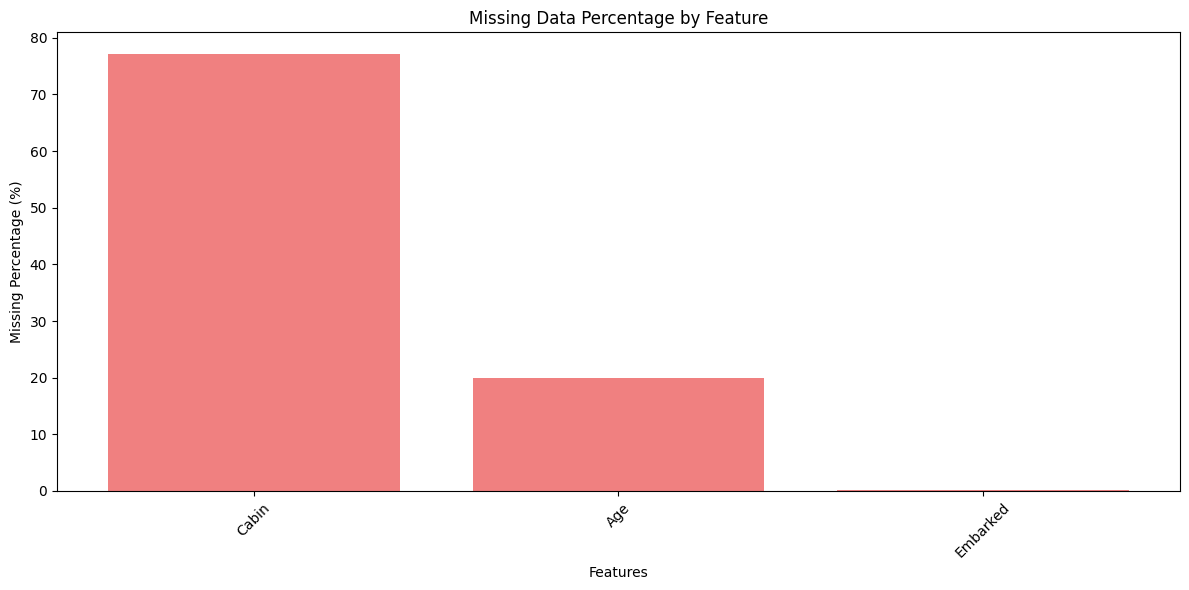

In [5]:
# Check for missing values
print("\n4. MISSING VALUES ANALYSIS")
print("-"*30)
missing_data = df.isnull().sum()
missing_percent = 100 * missing_data / len(df)
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)
print(missing_df)

# Visualize missing data
plt.figure(figsize=(12, 6))
missing_df_filtered = missing_df[missing_df['Missing Count'] > 0]
plt.bar(missing_df_filtered.index, missing_df_filtered['Percentage'], color='lightcoral')
plt.title('Missing Data Percentage by Feature')
plt.xlabel('Features')
plt.ylabel('Missing Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Categorical Variables Analysis

In [6]:
# Value counts for categorical variables
print("\n5. CATEGORICAL VARIABLES ANALYSIS")
print("-"*30)

categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']
for col in categorical_cols:
    print(f"\n{col} - Value Counts:")
    print(df[col].value_counts())
    print(f"{col} - Percentage:")
    print(df[col].value_counts(normalize=True) * 100)


5. CATEGORICAL VARIABLES ANALYSIS
------------------------------

Survived - Value Counts:
0    549
1    342
Name: Survived, dtype: int64
Survived - Percentage:
0    61.616162
1    38.383838
Name: Survived, dtype: float64

Pclass - Value Counts:
3    491
1    216
2    184
Name: Pclass, dtype: int64
Pclass - Percentage:
3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

Sex - Value Counts:
male      577
female    314
Name: Sex, dtype: int64
Sex - Percentage:
male      64.758698
female    35.241302
Name: Sex, dtype: float64

Embarked - Value Counts:
S    644
C    168
Q     77
Name: Embarked, dtype: int64
Embarked - Percentage:
S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64


## 5. Basic Distribution Visualizations

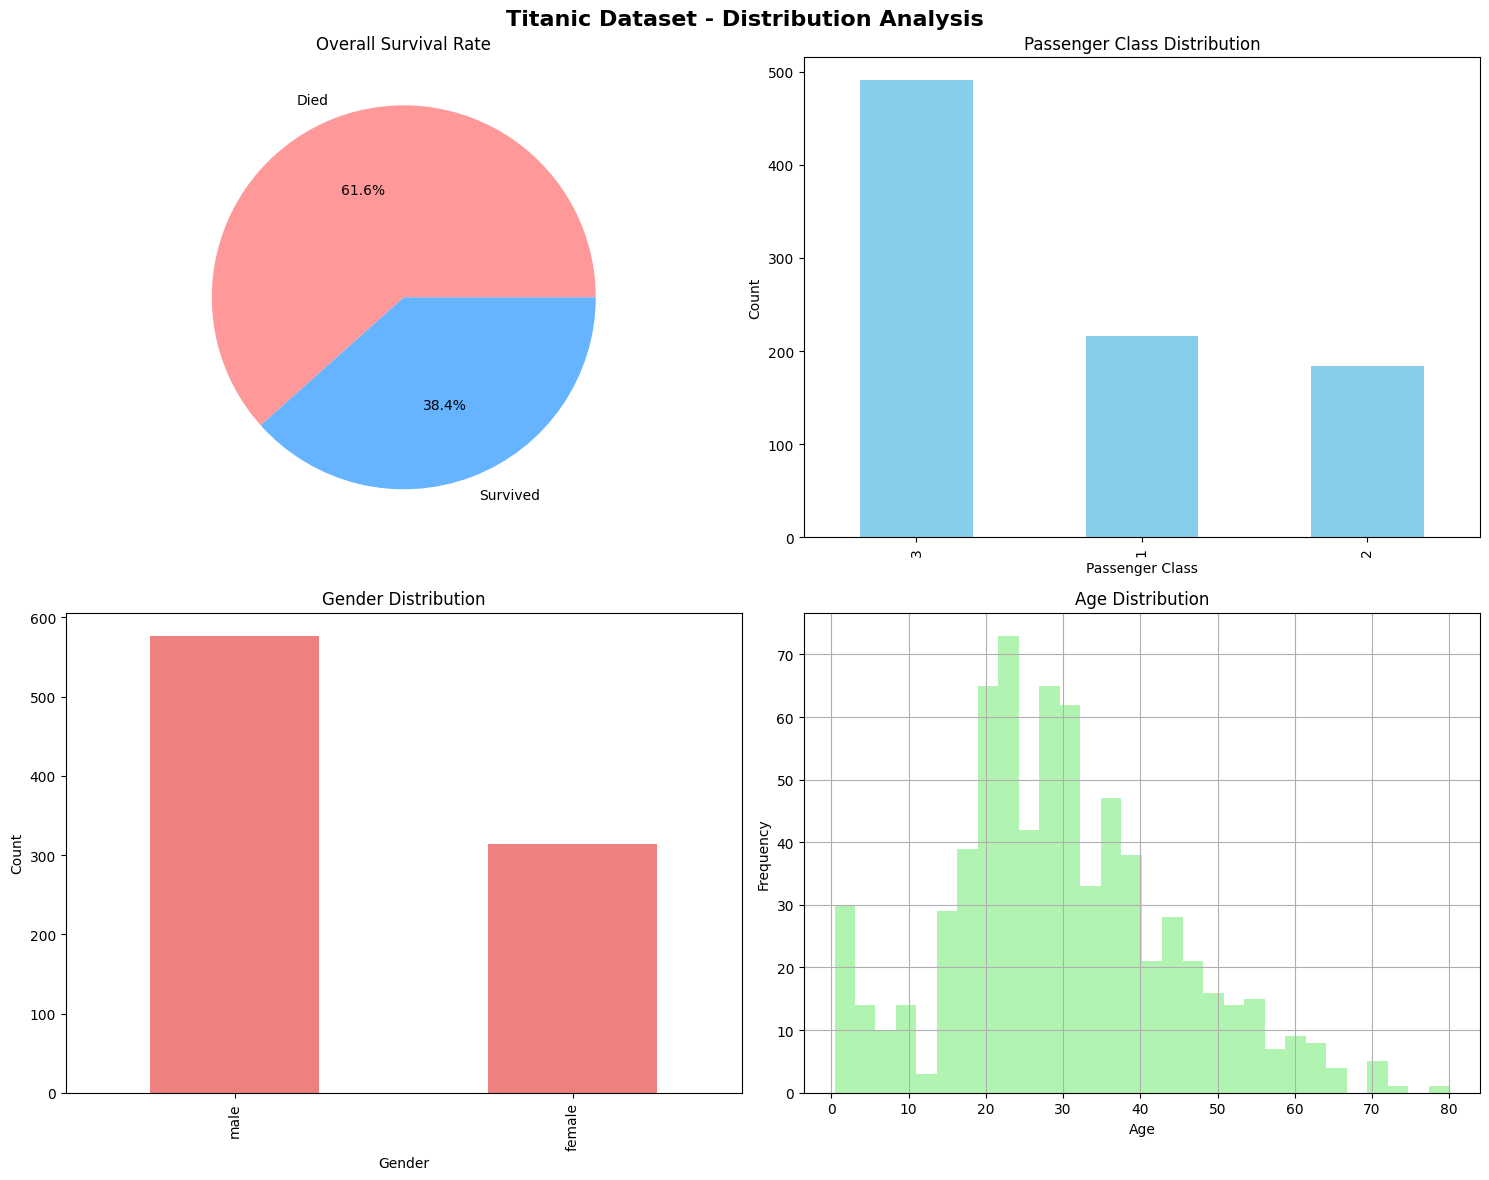

In [7]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Titanic Dataset - Distribution Analysis', fontsize=16, fontweight='bold')

# Survival Distribution
survival_counts = df['Survived'].value_counts()
axes[0,0].pie(survival_counts.values, labels=['Died', 'Survived'], autopct='%1.1f%%', 
              colors=['#ff9999', '#66b3ff'])
axes[0,0].set_title('Overall Survival Rate')

# Passenger Class Distribution
df['Pclass'].value_counts().plot(kind='bar', ax=axes[0,1], color='skyblue')
axes[0,1].set_title('Passenger Class Distribution')
axes[0,1].set_xlabel('Passenger Class')
axes[0,1].set_ylabel('Count')

# Gender Distribution
df['Sex'].value_counts().plot(kind='bar', ax=axes[1,0], color='lightcoral')
axes[1,0].set_title('Gender Distribution')
axes[1,0].set_xlabel('Gender')
axes[1,0].set_ylabel('Count')

# Age Distribution
df['Age'].dropna().hist(bins=30, ax=axes[1,1], color='lightgreen', alpha=0.7)
axes[1,1].set_title('Age Distribution')
axes[1,1].set_xlabel('Age')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 6. Survival Analysis by Different Factors

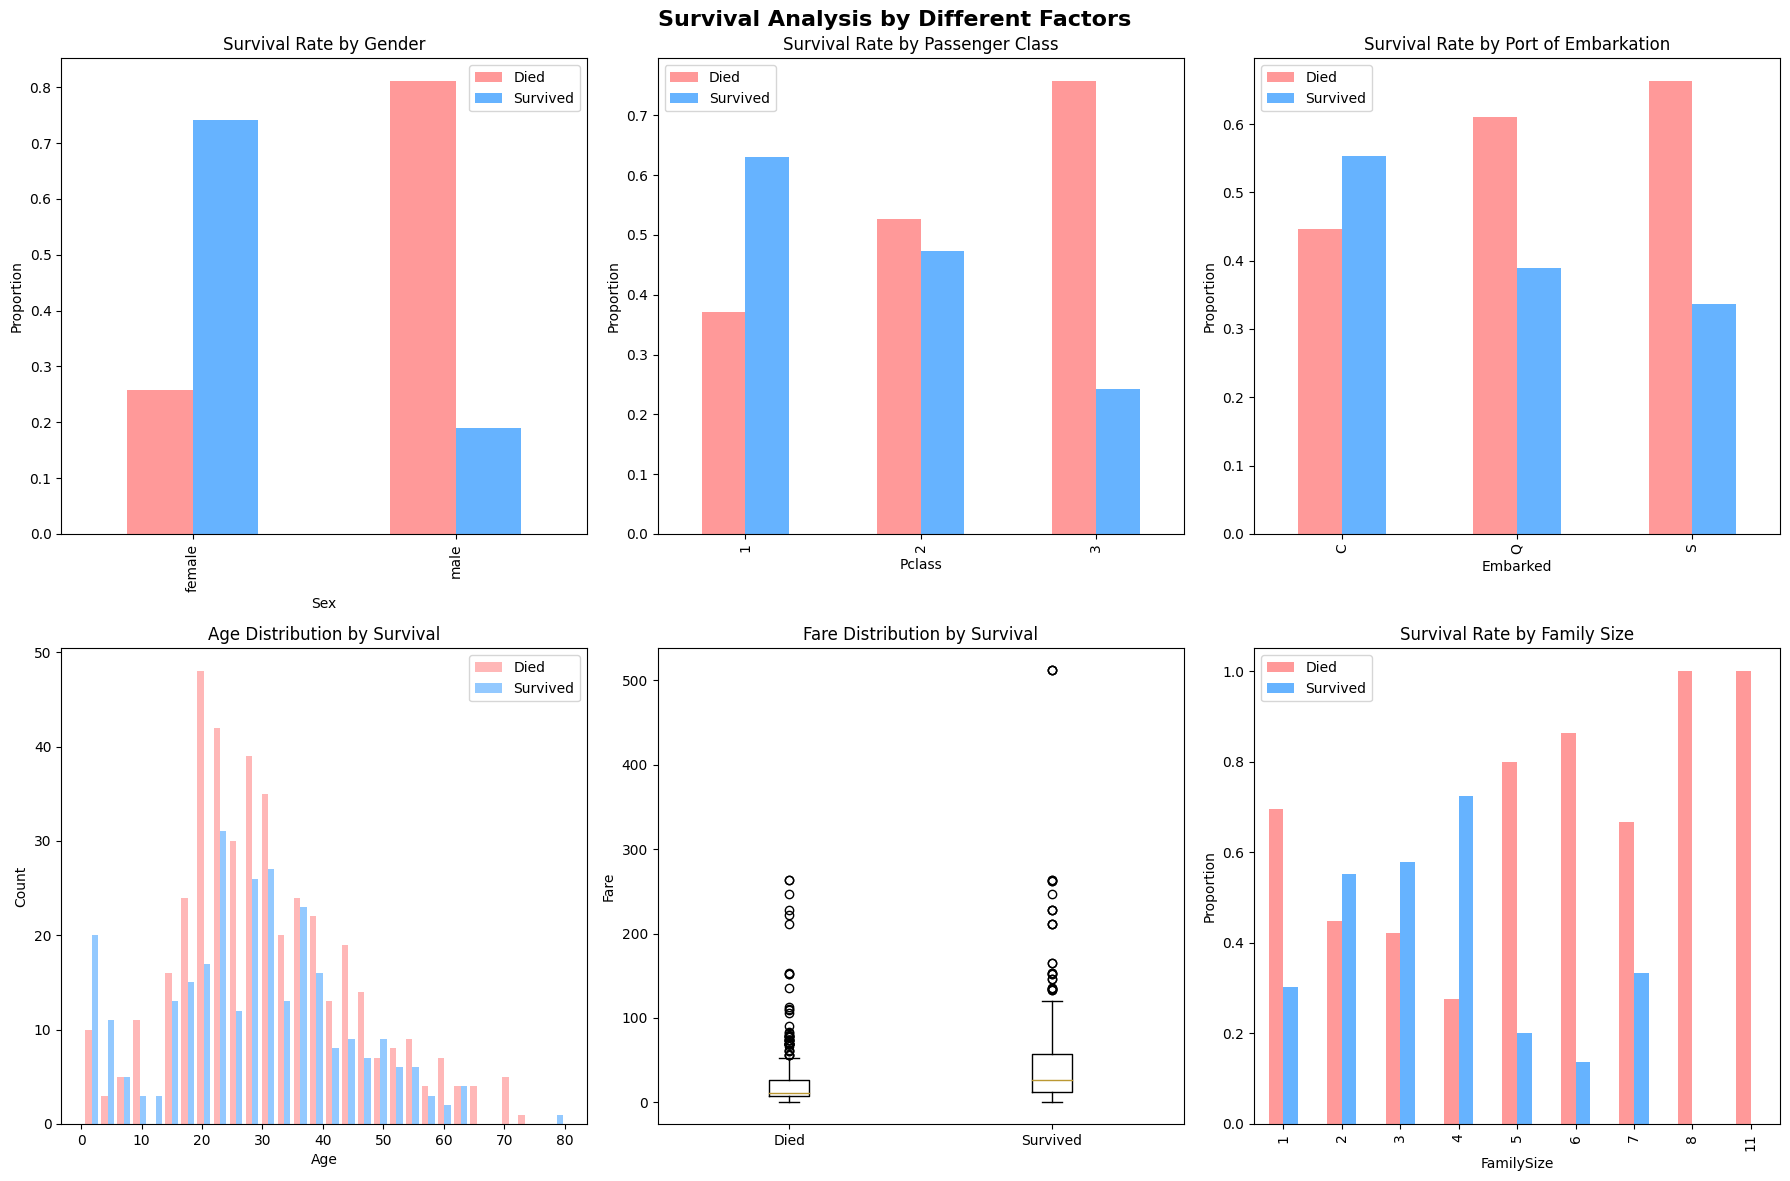

In [8]:
# Survival Analysis by different factors
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Survival Analysis by Different Factors', fontsize=16, fontweight='bold')

# Survival by Gender
pd.crosstab(df['Sex'], df['Survived'], normalize='index').plot(kind='bar', 
                                                               ax=axes[0,0], 
                                                               color=['#ff9999', '#66b3ff'])
axes[0,0].set_title('Survival Rate by Gender')
axes[0,0].set_ylabel('Proportion')
axes[0,0].legend(['Died', 'Survived'])

# Survival by Passenger Class
pd.crosstab(df['Pclass'], df['Survived'], normalize='index').plot(kind='bar', 
                                                                  ax=axes[0,1],
                                                                  color=['#ff9999', '#66b3ff'])
axes[0,1].set_title('Survival Rate by Passenger Class')
axes[0,1].set_ylabel('Proportion')
axes[0,1].legend(['Died', 'Survived'])

# Survival by Embarked
pd.crosstab(df['Embarked'], df['Survived'], normalize='index').plot(kind='bar', 
                                                                    ax=axes[0,2],
                                                                    color=['#ff9999', '#66b3ff'])
axes[0,2].set_title('Survival Rate by Port of Embarkation')
axes[0,2].set_ylabel('Proportion')
axes[0,2].legend(['Died', 'Survived'])

# Age vs Survival
survived_ages = df[df['Survived'] == 1]['Age'].dropna()
died_ages = df[df['Survived'] == 0]['Age'].dropna()
axes[1,0].hist([died_ages, survived_ages], bins=30, label=['Died', 'Survived'], 
               color=['#ff9999', '#66b3ff'], alpha=0.7)
axes[1,0].set_title('Age Distribution by Survival')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Count')
axes[1,0].legend()

# Fare vs Survival
axes[1,1].boxplot([df[df['Survived'] == 0]['Fare'].dropna(), 
                   df[df['Survived'] == 1]['Fare'].dropna()],
                  labels=['Died', 'Survived'])
axes[1,1].set_title('Fare Distribution by Survival')
axes[1,1].set_ylabel('Fare')

# Family Size vs Survival
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
pd.crosstab(df['FamilySize'], df['Survived'], normalize='index').plot(kind='bar', 
                                                                      ax=axes[1,2],
                                                                      color=['#ff9999', '#66b3ff'])
axes[1,2].set_title('Survival Rate by Family Size')
axes[1,2].set_ylabel('Proportion')
axes[1,2].legend(['Died', 'Survived'])

plt.tight_layout()
plt.show()

## 7. Correlation Analysis


7. CORRELATION ANALYSIS
------------------------------


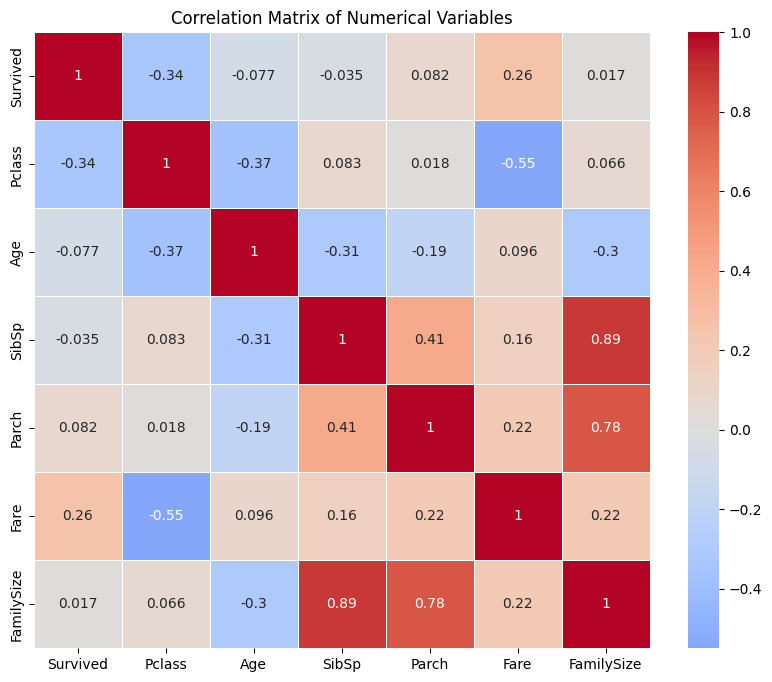


Correlation with Survival:
Survived      1.000000
Fare          0.257307
Parch         0.081629
FamilySize    0.016639
SibSp        -0.035322
Age          -0.077221
Pclass       -0.338481
Name: Survived, dtype: float64


In [9]:
# Correlation Analysis
print("\n7. CORRELATION ANALYSIS")
print("-"*30)

# Select numerical columns for correlation
numerical_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Print correlation with survival
print("\nCorrelation with Survival:")
survival_corr = correlation_matrix['Survived'].sort_values(ascending=False)
print(survival_corr)

## 8. Pairplot Analysis


8. PAIRPLOT ANALYSIS
------------------------------


<Figure size 1200x1000 with 0 Axes>

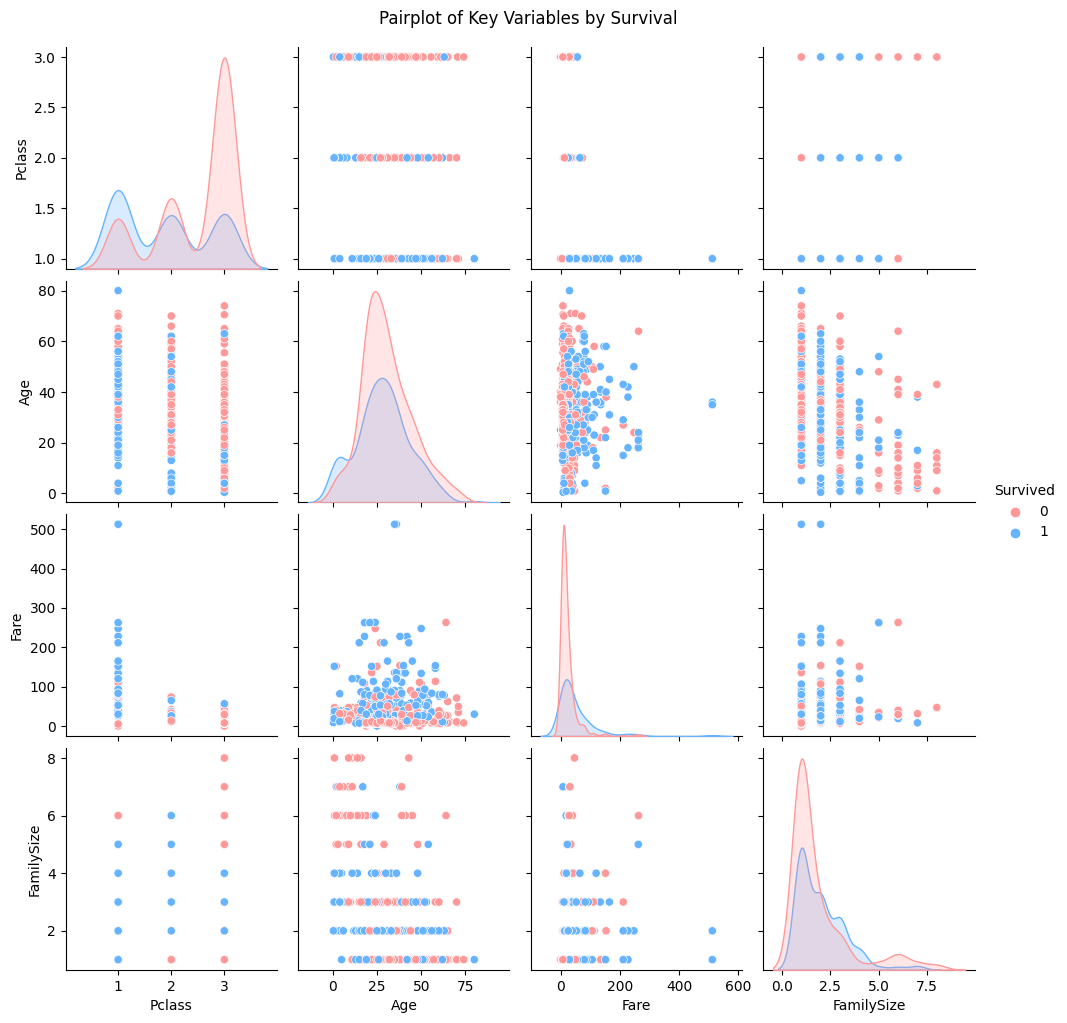

In [10]:
# Pairplot for key numerical variables
print("\n8. PAIRPLOT ANALYSIS")
print("-"*30)

key_vars = ['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize']
df_subset = df[key_vars].dropna()

plt.figure(figsize=(12, 10))
sns.pairplot(df_subset, hue='Survived', palette={0: '#ff9999', 1: '#66b3ff'})
plt.suptitle('Pairplot of Key Variables by Survival', y=1.02)
plt.show()

## 9. Advanced Insights - Age Group Analysis


9. ADVANCED INSIGHTS
------------------------------

Survival Rate by Age Group:
Survived            0         1
AgeGroup                       
Child        0.420290  0.579710
Teen         0.571429  0.428571
Young Adult  0.617318  0.382682
Adult        0.600000  0.400000
Senior       0.772727  0.227273


<Figure size 1000x600 with 0 Axes>

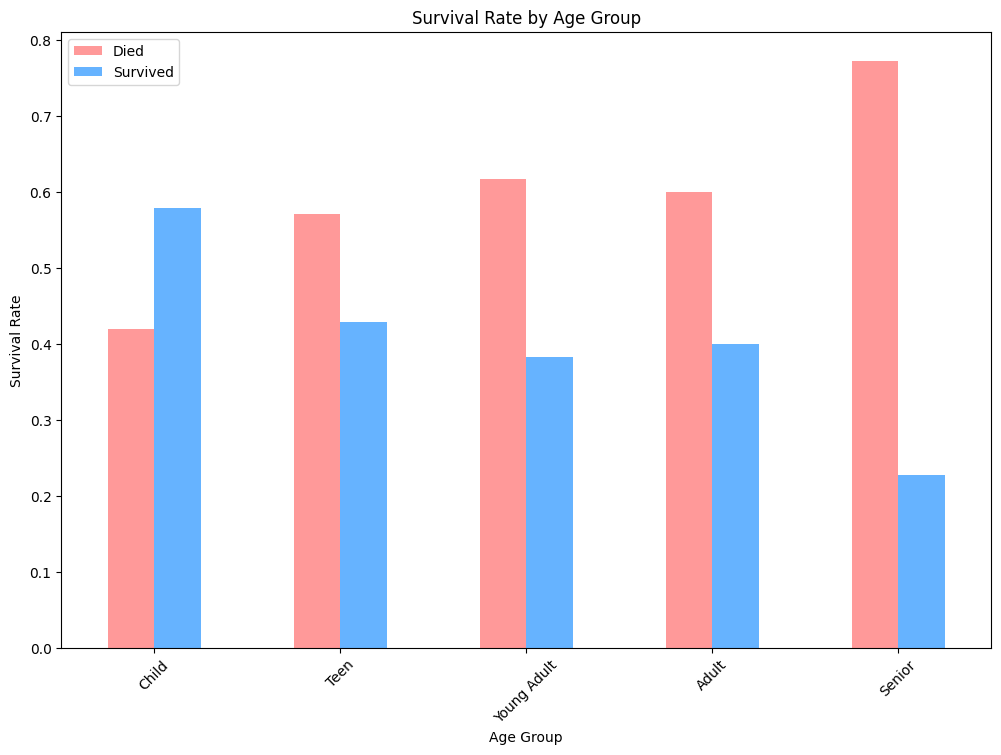

In [11]:
# Advanced Analysis
print("\n9. ADVANCED INSIGHTS")
print("-"*30)

# Survival rate by Age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                        labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
age_survival = pd.crosstab(df['AgeGroup'], df['Survived'], normalize='index')
print("\nSurvival Rate by Age Group:")
print(age_survival)

plt.figure(figsize=(10, 6))
age_survival.plot(kind='bar', color=['#ff9999', '#66b3ff'])
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.legend(['Died', 'Survived'])
plt.xticks(rotation=45)
plt.show()

## 10. Statistical Tests

In [12]:
# Statistical Tests
print("\n10. STATISTICAL TESTS")
print("-"*30)

# Chi-square test for categorical variables
categorical_vars = ['Sex', 'Pclass', 'Embarked']
for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df['Survived'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi-square test for {var} vs Survival:")
    print(f"Chi-square statistic: {chi2:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Significant at 0.05 level: {'Yes' if p_value < 0.05 else 'No'}")

# T-test for numerical variables
numerical_vars = ['Age', 'Fare']
for var in numerical_vars:
    survived = df[df['Survived'] == 1][var].dropna()
    died = df[df['Survived'] == 0][var].dropna()
    
    t_stat, p_value = ttest_ind(survived, died)
    print(f"\nT-test for {var} between Survived and Died:")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Significant at 0.05 level: {'Yes' if p_value < 0.05 else 'No'}")


10. STATISTICAL TESTS
------------------------------

Chi-square test for Sex vs Survival:
Chi-square statistic: 260.7170
P-value: 0.0000
Significant at 0.05 level: Yes

Chi-square test for Pclass vs Survival:
Chi-square statistic: 102.8890
P-value: 0.0000
Significant at 0.05 level: Yes

Chi-square test for Embarked vs Survival:
Chi-square statistic: 26.4891
P-value: 0.0000
Significant at 0.05 level: Yes

T-test for Age between Survived and Died:
T-statistic: -2.0667
P-value: 0.0391
Significant at 0.05 level: Yes

T-test for Fare between Survived and Died:
T-statistic: 7.9392
P-value: 0.0000
Significant at 0.05 level: Yes


## 11. Key Findings Summary

In [13]:
print("\n" + "="*60)
print("KEY OBSERVATIONS AND FINDINGS")
print("="*60)

# Calculate key statistics
survival_rate = df['Survived'].mean() * 100
female_survival = df[df['Sex'] == 'female']['Survived'].mean() * 100
male_survival = df[df['Sex'] == 'male']['Survived'].mean() * 100
class1_survival = df[df['Pclass'] == 1]['Survived'].mean() * 100
class2_survival = df[df['Pclass'] == 2]['Survived'].mean() * 100
class3_survival = df[df['Pclass'] == 3]['Survived'].mean() * 100

print(f"""
1. SURVIVAL OVERVIEW:
   - Overall survival rate: {survival_rate:.1f}%
   - {df['Survived'].value_counts()[0]} passengers died, {df['Survived'].value_counts()[1]} survived

2. GENDER IMPACT:
   - Women had significantly higher survival rate ({female_survival:.1f}%) than men ({male_survival:.1f}%)
   - "Women and children first" policy clearly implemented

3. PASSENGER CLASS:
   - First class: {class1_survival:.0f}% survival rate
   - Second class: {class2_survival:.0f}% survival rate  
   - Third class: {class3_survival:.0f}% survival rate
   - Clear correlation between social status and survival

4. AGE PATTERNS:
   - Children had higher survival rates
   - Age shows moderate negative correlation with survival
   - Missing age data for {df['Age'].isnull().sum()} passengers ({df['Age'].isnull().sum()/len(df)*100:.1f}%)

5. FAMILY SIZE:
   - Small families (2-4 members) had better survival rates
   - Very large families had lower survival rates
   - Traveling alone also reduced survival chances

6. FARE AND SURVIVAL:
   - Higher fare passengers had better survival rates
   - Strong positive correlation between fare and survival

7. PORT OF EMBARKATION:
   - Cherbourg passengers had highest survival rate
   - Different ports showed varying survival patterns

8. STATISTICAL SIGNIFICANCE:
   - Gender, class, and embarked port all show significant association with survival (p < 0.05)
   - Age and fare show significant differences between survivors and non-survivors

9. MISSING DATA:
   - Age: {df['Age'].isnull().sum()/len(df)*100:.1f}% missing
   - Cabin: {df['Cabin'].isnull().sum()/len(df)*100:.1f}% missing
   - Embarked: {df['Embarked'].isnull().sum()/len(df)*100:.1f}% missing

10. KEY PREDICTORS:
    - Gender (strongest predictor)
    - Passenger class
    - Age
    - Fare
    - Family size
""")


KEY OBSERVATIONS AND FINDINGS

1. SURVIVAL OVERVIEW:
   - Overall survival rate: 38.4%
   - 549 passengers died, 342 survived

2. GENDER IMPACT:
   - Women had significantly higher survival rate (74.2%) than men (18.9%)
   - "Women and children first" policy clearly implemented

3. PASSENGER CLASS:
   - First class: 63% survival rate
   - Second class: 47% survival rate  
   - Third class: 24% survival rate
   - Clear correlation between social status and survival

4. AGE PATTERNS:
   - Children had higher survival rates
   - Age shows moderate negative correlation with survival
   - Missing age data for 177 passengers (19.9%)

5. FAMILY SIZE:
   - Small families (2-4 members) had better survival rates
   - Very large families had lower survival rates
   - Traveling alone also reduced survival chances

6. FARE AND SURVIVAL:
   - Higher fare passengers had better survival rates
   - Strong positive correlation between fare and survival

7. PORT OF EMBARKATION:
   - Cherbourg passengers

---

## Conclusions

This exploratory data analysis of the Titanic dataset reveals several critical insights:

**Primary Findings:**
- **Gender was the strongest predictor** of survival, with women having a 74% survival rate compared to 19% for men
- **Socioeconomic status mattered** - first-class passengers had nearly 3x better survival rates than third-class
- **Age and family structure influenced outcomes** - children and small families had better chances
- **Multiple factors interacted** to determine survival probability

**Data Quality Notes:**
- The dataset has significant missing values in Age (20%) and Cabin (77%) columns
- All statistical tests showed significant associations with survival (p < 0.05)

**Implications:**
This analysis demonstrates how social factors, demographics, and emergency protocols influenced survival during the Titanic disaster, providing valuable historical insights and serving as an excellent dataset for predictive modeling exercises.

---
*Report generated using Python, pandas, matplotlib, and seaborn*